In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## (1) Series

In [35]:
series_1 = pd.Series([1,2,3],index=['first','second','third'])

series_dict = {'Monday' : 1, 'Tuesday' : 2, 'Wednesday' :3}
series_2 = pd.Series(series_dict)
# add name to series and index of series
series_2.name = 'Weekday_num'
series_2.index.name = 'Weekday'

In [37]:
print('-----series_1-----')
print(series_1)
print(series_1.values)
print(series_1.index)
print('\n\n-----series_2-----')
print(series_2)

-----series_1-----
first     1
second    2
third     3
dtype: int64
[1 2 3]
Index(['first', 'second', 'third'], dtype='object')


-----series_2-----
Weekday
Monday       1
Tuesday      2
Wednesday    3
Name: Weekday_num, dtype: int64


In [8]:
# logic slice
series_1[series_1 > 1]

second    2
third     3
dtype: int64

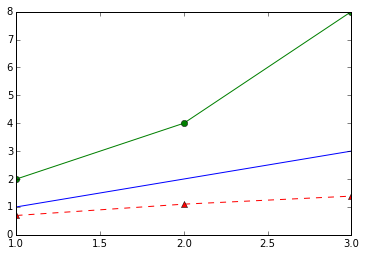

In [23]:
# add element-wise calculations
plt.plot(series_1,np.log1p(series_1),'r^--', series_1,series_1,'b-',series_1,2**series_1, 'go-')

In [26]:
series_3= pd.Series(series_dict, index =['Monday', 'Sunday','Wednesday'])
series_3

Monday        1
Sunday      NaN
Wednesday     3
dtype: float64

In [32]:
# 
print('-----series_2-----')
print(series_2)
print('-----series_3-----')
print(series_3)
print('-----series_2 + series_3-- indices must exist in both series---')
series_4 = series_2 + series_3
print(series_4)

# print if nan
pd.isnull(series_4)


-----series_2-----
Monday       1
Tuesday      2
Wednesday    3
dtype: int64
-----series_3-----
Monday        1
Sunday      NaN
Wednesday     3
dtype: float64
-----series_2 + series_3-----
Monday        2
Sunday      NaN
Tuesday     NaN
Wednesday     6
Name: Combination, dtype: float64


Monday       False
Sunday        True
Tuesday       True
Wednesday    False
Name: Combination, dtype: bool

## (2) DateFrame

In [119]:
df1_dict = {'year': [2013, 2015, 2014], 'country' : ['China' , 'USA', 'Russia'], \
           'GDP':[6.2, 2.0, 0.8]} 

In [120]:
df1 = pd.DataFrame(df1_dict)
df1

,GDP,country,year
0,6.2,China,2013
1,2.0,USA,2015
2,0.8,Russia,2014


In [121]:
# rearrange columns, assign index
df2 = pd.DataFrame(df1_dict, columns = ['country', 'year', 'GDP','debt'], \
                   index = ['one','two','three'])
df2

,country,year,GDP,debt
one,China,2013,6.2,NaN
two,USA,2015,2.0,NaN
three,Russia,2014,0.8,NaN


      country  year  GDP   debt
one     China  2013  6.2  False
two       USA  2015  2.0  False
three  Russia  2014  0.8   True


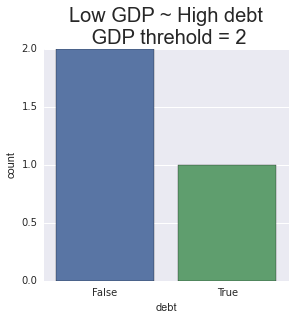

In [122]:
# modify columns value with same length
threhold = 2
df2['debt'] = df2.GDP < threhold
print(df2)
# ?? Map True/False to str
#df2['debt'] = 'High' if df2['debt'] == True
#print(df2)
g = sns.factorplot('debt',data= df2,kind="count",legend=True) 
sns.plt.title('Low GDP ~ High debt \n GDP threhold = '+ str(threhold), fontsize=20)

In [123]:
# >>> return properties of dataframe
print('------columns name----------')
print(list(df2.columns))
print('------uniques in column country----------')
print(list(df2.country.unique()))

------columns name----------
['country', 'year', 'GDP', 'debt']
------uniques in column country----------
['China', 'USA', 'Russia']


In [124]:
# >> retrive columns (Series with name)
df2.year

one      2013
two      2015
three    2014
Name: year, dtype: int64

In [125]:
# >> retrive record (Series with name)
print(list(df2.index))
print('\n----get record index = two------')
df2.ix['two']

['one', 'two', 'three']

----get record index = two------


country      USA
year        2015
GDP            2
debt       False
Name: two, dtype: object

In [152]:
# >> retrive element and elements
print(list(df1['country'][0:2]))
print([df2['country']['one'],df2['country']['two']])

['China', 'USA']
['China', 'USA']


In [126]:
# >>> del columns
del df2['debt']
df2

,country,year,GDP
one,China,2013,6.2
two,USA,2015,2.0
three,Russia,2014,0.8
